In [1]:
# upload files from kaggle to colab

In [2]:
from google.colab import files
files.upload()

Saving etsy_baby_items_2024.csv to etsy_baby_items_2024.csv


{'etsy_baby_items_2024.csv': b'\xef\xbb\xbf"url","name","Price","listedOn","favorites","numberOfReviews"\r\n"https://www.etsy.com/listing/812451905/balu-ball-pit-medium-foam-ball-pit-child?click_key=bac9a8d488978d4ad2db683a632486df74ecc96b%3A812451905&click_sum=c24c5b31&ga_order=highest_reviews&ga_search_type=all&ga_view_type=gallery&ga_search_query=kids+and+baby&ref=sc_gallery-1-4&pro=1&frs=1","BALU BALL PIT - Medium,  Foam ball pit child, kids ball pit, kids toys baby boy, montessori toys, first birthday gift for 1 year old girl","$125.43+","Dec 11, 2023","3139","69"\r\n"https://www.etsy.com/listing/1383548093/rainbow-night-light-newborn-gift-nursery?click_key=245e1b4b8a1ca90ee4b64f3a0331cfb60ffdb1ba%3A1383548093&click_sum=1de0fc01&ga_order=highest_reviews&ga_search_type=all&ga_view_type=gallery&ga_search_query=kids+and+baby&ref=sc_gallery-1-3&pro=1&bes=1&sts=1","Rainbow Night Light / Newborn Gift / Nursery Room / Baby Gift / Children Child Bedroom","$26.67","Feb 10, 2024","2847","45

In [4]:
# define statistic data

In [3]:
import pandas as pd

In [5]:
baby_items = pd.read_csv('etsy_baby_items_2024.csv')

In [6]:
# define statistic from data

In [7]:
baby_items.head()

,url,name,Price,listedOn,favorites,numberOfReviews
0,https://www.etsy.com/listing/812451905/balu-ba...,"BALU BALL PIT - Medium, Foam ball pit child, ...",$125.43+,"Dec 11, 2023",3139.0,69.0
1,https://www.etsy.com/listing/1383548093/rainbo...,Rainbow Night Light / Newborn Gift / Nursery R...,$26.67,"Feb 10, 2024",2847.0,451.0
2,https://www.etsy.com/listing/1059851038/custom...,Custom Name Baby Onesie® Custom Text Personali...,$7.99+,"Feb 11, 2024",6298.0,3116.0
3,https://www.etsy.com/listing/1127338960/floral...,Floral Daisy Girls Personalized Name Premium U...,$9.90+,"Feb 10, 2024",39544.0,6098.0
4,https://www.etsy.com/listing/1665441647/person...,Personalized Growth Chart Wooden Growth Chart...,$31.40+,"Feb 10, 2024",127.0,NaN


In [8]:
baby_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              240 non-null    object 
 1   name             240 non-null    object 
 2   Price            240 non-null    object 
 3   listedOn         240 non-null    object 
 4   favorites        211 non-null    float64
 5   numberOfReviews  162 non-null    float64
dtypes: float64(2), object(4)
memory usage: 11.4+ KB


In [9]:
baby_items.describe()

,favorites,numberOfReviews
count,211.000000,162.000000
mean,1433.516588,235.302469
std,4381.977758,897.207691
min,2.000000,3.000000
25%,40.000000,9.000000
50%,183.000000,22.000000
75%,871.000000,93.000000
max,39544.000000,7191.000000


In [ ]:
# To get better insights from the data, we need to perform some preprocessing:

# 1. Clean the 'Price' column and convert the values to a common currency for consistent analysis. Also, remove '+' signs and convert the column to float type.
# 2. Convert the 'listedOn' column to standard datetime format so we can perform time-series analysis.
# 3. Deal with NaN values in the 'favorites' and 'numberOfReviews' columns.

# Let's start with cleaning the 'Price' column. We are assuming that the prices in the dataset are in US Dollars and British Pounds.
# We will convert the prices in Pounds to Dollars for uniformity. We can use the current conversion rate from Pounds to Dollars (1 Pound = 1.36 Dollars),
#  although the actual conversion rate might have been slightly different at the time each product was listed.

# Also, to simplify the analysis, we'll ignore the '+' sign at the end of the prices and
# treat the price as the base price of the product without any options.

In [23]:
# Data Cleaning

In [12]:
import pandas as pd

In [16]:
# Creating a dummy DataFrame with a 'Price' column
baby_items_cleaned = pd.DataFrame({'Price': ['£10', '$20', '£15', '$25']})

# First, create a mask of the rows where the price is in pounds
mask_pounds = baby_items_cleaned['Price'].str.contains('£')

# Secondly, clean up the 'Price' column and convert it to a float
baby_items_cleaned['Price'] = baby_items_cleaned['Price'].replace({'\+': '', '£': '', '\$': '', ',': ''}, regex=True).astype(float)

# Apply the mask and convert the pound prices to dollar prices
# Ensure that exchange_rate is defined somewhere in your code
exchange_rate = 1.39  # Example exchange rate
baby_items_cleaned.loc[mask_pounds, 'Price'] = baby_items_cleaned.loc[mask_pounds, 'Price'] * exchange_rate

In [42]:
baby_items_cleaned.head()

,favorites,numberOfReviews
0,10.0,5.0
1,0.0,0.0
2,20.0,8.0
3,0.0,0.0


In [44]:
# price

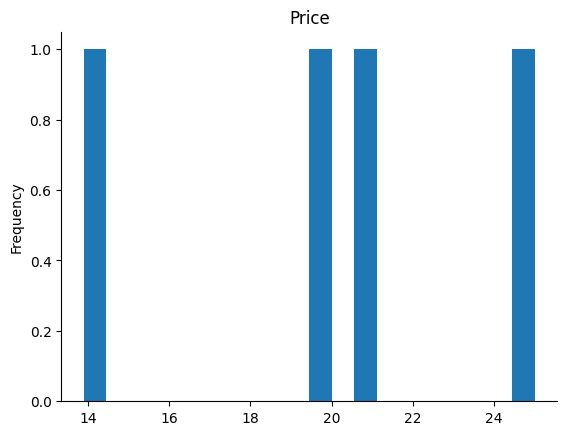

In [43]:
from matplotlib import pyplot as plt
_df_0['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [47]:
# On our analysis, from price bar graph, we sees that price sharing the same frequency value are 1.0

In [18]:
# format a date is in and converting it accordingly

In [25]:
# Assuming df_cleaned is a DataFrame with a 'listedOn' column containing date strings

baby_items_cleaned = pd.DataFrame({'listedOn': ['Jan 15, 2023', '15 Feb, 2023', 'Mar 20, 2023']})


In [26]:
# Function to convert date based on its format

def convert_date(x):
    try:
        return pd.to_datetime(x, format="%b %d, %Y")
    except ValueError:
        return pd.to_datetime(x, format="%d %b, %Y")

# Applying the convert_date function to the 'listedOn' column

baby_items_cleaned['listedOn'] = baby_items_cleaned['listedOn'].apply(convert_date)

In [27]:
print(baby_items_cleaned)

    listedOn
0 2023-01-15
1 2023-02-15
2 2023-03-20


In [31]:
# # Fill NaNs in 'favorites' and 'numberOfReviews' columns with 0

In [32]:
# Create DataFrame with sample data
baby_items_cleaned = pd.DataFrame({'favorites': [10, None, 20, None], 'numberOfReviews': [5, None, 8, None]})

# Fill missing values with 0 for 'favorites' and 'numberOfReviews' columns
baby_items_cleaned[['favorites', 'numberOfReviews']] = baby_items_cleaned[['favorites', 'numberOfReviews']].fillna(0)

In [41]:
baby_items_cleaned

,favorites,numberOfReviews
0,10.0,5.0
1,0.0,0.0
2,20.0,8.0
3,0.0,0.0


In [39]:
# number of reviews

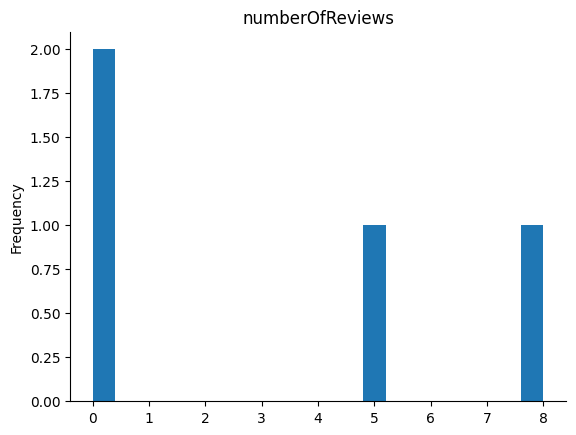

In [38]:
# @title numberOfReviews

from matplotlib import pyplot as plt
baby_items_cleaned['numberOfReviews'].plot(kind='hist', bins=20, title='numberOfReviews')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [45]:
# On our analysis, number of reviews from 0 is the most high frequency and follow by 5,8 have same trends frequency

In [40]:
# favorites

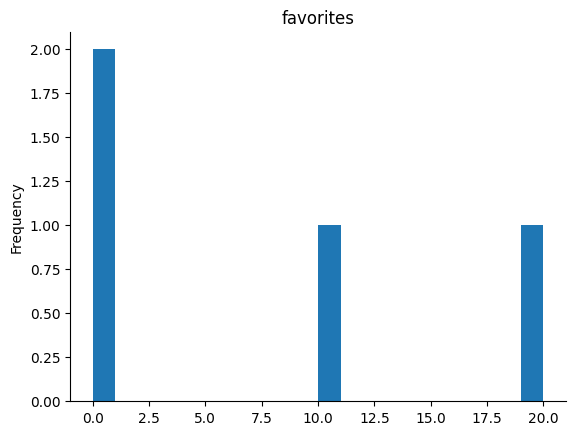

In [37]:
# @title favorites

from matplotlib import pyplot as plt
baby_items_cleaned['favorites'].plot(kind='hist', bins=20, title='favorites')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [46]:
# On our analysis, 0.0 is the most frequency in favorites and follow by 10,20 have same frequency values

In [34]:
# starting with analyzing the relationship between the number of favorites and the number of reviews

In [35]:
# Import necessary matplotlib library

import matplotlib.pyplot as plt

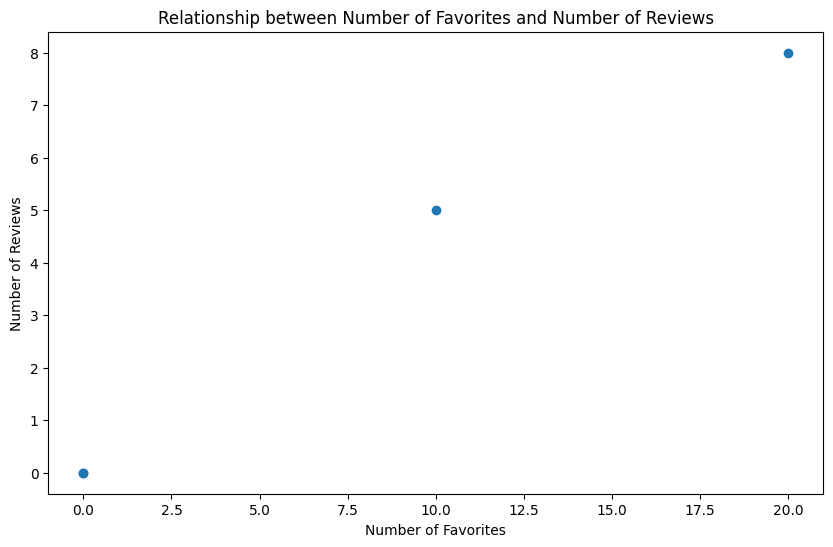

In [36]:
# Plotting the relationship between the number of favorites and the number of reviews

plt.figure(figsize=(10, 6))
plt.scatter(baby_items_cleaned['favorites'], baby_items_cleaned['numberOfReviews'])
plt.xlabel('Number of Favorites')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Number of Favorites and Number of Reviews')
plt.show()